## Credit Card Fraud Detection - Capstone Project (DA) -- Presented by Saikat Chowdhury


## Problem Statement: 
Fraudulent activities have increased a lot in the recent year. Due to this steep increase in banking frauds, it is important to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day.
Every fraudulent credit card transaction that occur is a direct financial loss to the bank as the bank is responsible for the fraud transactions as well it also affects the overall customer satisfaction adversely.    
**The aim of this project is to identify and predict fraudulent credit card transactions using machine learning models.
The Credit Card Fraud Detection Problem includes modelling past credit card transactions with the data of the ones that turned out to be fraud.**

### Importing python libraries for Prcessing the data

In [1]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 101 kB 4.5 MB/s 


### Mounting the google drive

In [2]:
#df = pd.read_csv('creditcard.csv')
#df.head()
#Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Loading both, test and train data set into separate data frames

In [3]:
#Loaded both the data frames
train_data=pd.read_csv("/content/gdrive/MyDrive/fraudTrain.csv")
test_data=pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

#### Merging both the test and train data set and then we will start cleansing the data

In [4]:
# To merge both the data set and then check that new dataset
df_credit = pd.concat([train_data, test_data])
df_credit.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632.0,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433.0,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


#### Checking null values in the new dataset

In [5]:
df_credit = df_credit.replace('Select', np.nan)
print('Percentage of null values per column')
100*(df_credit.isnull().sum()/len(df_credit.index))

Percentage of null values per column


Unnamed: 0               0.000000
trans_date_trans_time    0.000000
cc_num                   0.000373
merchant                 0.000373
category                 0.000373
amt                      0.000373
first                    0.000373
last                     0.000373
gender                   0.000373
street                   0.000373
city                     0.000373
state                    0.000373
zip                      0.000373
lat                      0.000373
long                     0.000373
city_pop                 0.000373
job                      0.000373
dob                      0.000747
trans_num                0.000747
unix_time                0.000747
merch_lat                0.000747
merch_long               0.000747
is_fraud                 0.000747
dtype: float64

 **- Inference:-** Null values are less and negligible in number so we can decide to drop these variable with null values

In [6]:
# Dropping the null values
df_credit.dropna(subset=['cc_num'], axis=0, inplace=True)
df_credit.dropna(subset=['dob'], axis=0, inplace=True)
df_credit.dropna(subset=['merchant'], axis=0, inplace=True)
df_credit.dropna(subset=['category'],axis=0, inplace=True)
df_credit.dropna(subset=['amt'],axis=0, inplace=True)
df_credit.dropna(subset=['first'],axis=0, inplace=True)
df_credit.dropna(subset=['last'],axis=0, inplace=True)
df_credit.dropna(subset=['gender'],axis=0, inplace=True)
df_credit.dropna(subset=['street'],axis=0, inplace=True)
df_credit.dropna(subset=['city'],axis=0, inplace=True)
df_credit.dropna(subset=['state'],axis=0, inplace=True)
df_credit.dropna(subset=['zip'],axis=0, inplace=True)
df_credit.dropna(subset=['lat'],axis=0, inplace=True)
df_credit.dropna(subset=['long'],axis=0, inplace=True)
df_credit.dropna(subset=['city_pop'],axis=0, inplace=True)
df_credit.dropna(subset=['job'],axis=0, inplace=True)
df_credit.dropna(subset=['dob'],axis=0, inplace=True)
df_credit.dropna(subset=['trans_num'],axis=0, inplace=True)
df_credit.dropna(subset=['unix_time'],axis=0, inplace=True)
df_credit.dropna(subset=['merch_lat'],axis=0, inplace=True)
df_credit.dropna(subset=['merch_long'],axis=0, inplace=True)
df_credit.dropna(subset=['is_fraud'],axis=0, inplace=True)

In [7]:
df_credit.isnull().values.any()

False

In [8]:
df_credit = df_credit.replace('Select', np.nan)
print('Percentage of null values per column')
100*(df_credit.isnull().sum()/len(df_credit.index))

Percentage of null values per column


Unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

#### Drop the clomun named -'Unnamed' as it will not require for any analysis

In [9]:
df_credit.drop(df_credit.columns[df_credit.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

#### added a column Distance to find the distance between the fraudster and actual customer location

In [10]:
df_credit['Distance']=''
df_credit['Distance'] = pd.to_numeric(df_credit['Distance'], downcast="float")
df_credit['lat']=np.radians(df_credit['lat'])
df_credit['long']=np.radians(df_credit['long'])
df_credit['merch_lat']=np.radians(df_credit['merch_lat'])
df_credit['merch_long']=np.radians(df_credit['merch_long'])

def distance(s_lat, s_lng, e_lat, e_lng):
    
    # approximate radius of earth in km
    R = 6373.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    
    return 2 * R * np.arcsin(np.sqrt(d)) 

df_credit['Distance']=distance(df_credit['lat'],df_credit['long'],df_credit['merch_lat'],df_credit['merch_long'])

#### added a new column Weekday to understand -on which day of the week maximum frauds happen

In [11]:
from datetime import date
import calendar
df_credit['trans_date_trans_time']= pd.to_datetime(df_credit['trans_date_trans_time'])
df_credit['Weekday'] = df_credit['trans_date_trans_time'].dt.day_name()

In [12]:
from datetime import date
today = date.today()
df_credit['Current Date']=today
df_credit.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Distance,Weekday,Current Date
0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,0.629694,-1.416825,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,0.628516,-1.432013,0.0,1.694346,Tuesday,2021-10-09
1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,0.853253,-2.063162,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,0.857987,-2.062743,0.0,0.528642,Tuesday,2021-10-09


In [13]:
## Convert DOB and Current Date into the data type- Date Time
df_credit["dob"]= pd.to_datetime(df_credit["dob"])
df_credit["Current Date"]= pd.to_datetime(df_credit["Current Date"])

In [14]:
df_credit['Age']= (df_credit['Current Date']-df_credit['dob'])
df_credit['Age']=df_credit['Age'].dt.days
df_credit['Age']=df_credit['Age']/365

In [15]:
df_credit = df_credit.rename(columns={"is_fraud":"Class"})
df_credit = df_credit.rename(columns={"trans_date_trans_time":"TransactionDateTime"})

In [16]:
df_credit['TransactionDate'] = pd.to_datetime(df_credit['TransactionDateTime']).dt.date
df_credit['TransactionTime'] = pd.to_datetime(df_credit['TransactionDateTime']).dt.time

#### Checking the data types of the features present in this data set

In [17]:
# checking data types of the dataset
df_credit.dtypes

TransactionDateTime    datetime64[ns]
cc_num                        float64
merchant                       object
category                       object
amt                           float64
first                          object
last                           object
gender                         object
street                         object
city                           object
state                          object
zip                           float64
lat                           float64
long                          float64
city_pop                      float64
job                            object
dob                    datetime64[ns]
trans_num                      object
unix_time                     float64
merch_lat                     float64
merch_long                    float64
Class                         float64
Distance                      float64
Weekday                        object
Current Date           datetime64[ns]
Age                           float64
TransactionD

In [18]:
df_credit['hour'] = df_credit['TransactionDateTime'].dt.hour
df_credit['minute'] = df_credit['TransactionDateTime'].dt.minute
df_credit['seconds'] = df_credit['TransactionDateTime'].dt.second
df_credit.head(2)

,TransactionDateTime,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,Class,Distance,Weekday,Current Date,Age,TransactionDate,TransactionTime,hour,minute,seconds
0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,0.629694,-1.416825,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,0.628516,-1.432013,0.0,1.694346,Tuesday,2021-10-09,33.608219,2019-01-01,00:00:18,0,0,18
1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,0.853253,-2.063162,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,0.857987,-2.062743,0.0,0.528642,Tuesday,2021-10-09,43.331507,2019-01-01,00:00:44,0,0,44


#### added a new column 'Total Time in Seconds' to see the maximum/minimum gap of time in which the fraud happens

In [19]:
df_credit['TotalTimeInSeconds']=df_credit['hour'] *3600  + df_credit['minute'] *60 + df_credit['seconds']

In [20]:
df_credit.head()

,TransactionDateTime,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,Class,Distance,Weekday,Current Date,Age,TransactionDate,TransactionTime,hour,minute,seconds,TotalTimeInSeconds
0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,0.629694,-1.416825,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,0.628516,-1.432013,0.0,1.694346,Tuesday,2021-10-09,33.608219,2019-01-01,00:00:18,0,0,18,18
1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,0.853253,-2.063162,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,0.857987,-2.062743,0.0,0.528642,Tuesday,2021-10-09,43.331507,2019-01-01,00:00:44,0,0,44,44
2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252.0,0.736194,-1.959342,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,0.753122,-1.957465,0.0,1.894433,Tuesday,2021-10-09,59.761644,2019-01-01,00:00:51,0,0,51,51
3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632.0,0.806876,-1.956755,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,0.820904,-1.964561,0.0,1.785593,Tuesday,2021-10-09,54.778082,2019-01-01,00:01:16,0,1,16,76
4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433.0,0.670568,-1.386889,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,0.675006,-1.372395,0.0,1.685945,Tuesday,2021-10-09,35.558904,2019-01-01,00:03:06,0,3,6,186


In [21]:
df_credit=df_credit.drop(['TransactionTime'],1)
df_credit=df_credit.drop(['hour'],1)
df_credit=df_credit.drop(['seconds'],1)
df_credit=df_credit.drop(['minute'],1)

In [22]:
df_credit=df_credit.drop_duplicates()

In [23]:
df_credit=df_credit.loc[~df_credit.index.duplicated(), :]

In [24]:
df_credit.index.is_unique

True

In [25]:
Credit_data=df_credit.copy(deep=True)

In [ ]:
Credit_data.shape

#### Dropping unwanted columns from the new data frame 

In [26]:

Credit_data=Credit_data.drop(['TransactionDateTime', 'first','last','trans_num','cc_num','unix_time','merch_lat','merch_long','city','street','Current Date','lat','long','dob','zip','TransactionDate'],1)

In [27]:
#list of numerical columns
numerical_columns={'amt','city_pop','Age','Distance','TotalTimeInSeconds'}
numerical_columns

{'Age', 'Distance', 'TotalTimeInSeconds', 'amt', 'city_pop'}

In [28]:
#list of target columns
target_columns={'Class'}
target_columns

{'Class'}

In [46]:
#list of categorical columns
categorical_columns={'category','merchant','job','state','gender','Weekday'}
categorical_columns

{'Weekday', 'category', 'gender', 'job', 'merchant', 'state'}

#### In the below few segments, we are just couting the number of records for each categorical features

In [29]:
Credit_data.gender.value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True) *100

F    54.68035
M    45.31965
Name: gender, dtype: float64

In [30]:
Credit_data.merchant.value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)

fraud_Kilback LLC                        0.003384
fraud_Cormier LLC                        0.002936
fraud_Schumm PLC                         0.002848
fraud_Boyer PLC                          0.002683
fraud_Dickinson Ltd                      0.002666
                                           ...   
fraud_Tromp Group                        0.000545
fraud_Reichel, Bradtke and Blanda        0.000537
fraud_Hodkiewicz, Prohaska and Paucek    0.000532
fraud_Ritchie, Oberbrunner and Cremin    0.000532
fraud_Kessler Group                      0.000528
Name: merchant, Length: 693, dtype: float64

In [31]:
Credit_data.job.value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True)

Exhibition designer                  0.007297
Film/video editor                    0.007276
Surveyor, land/geomatics             0.006680
Naval architect                      0.006540
Designer, ceramics/pottery           0.006359
                                       ...   
Engineer, site                       0.000051
Veterinary surgeon                   0.000034
Armed forces technical officer       0.000034
Sales promotion account executive    0.000030
Contracting civil engineer           0.000030
Name: job, Length: 480, dtype: float64

In [32]:
Credit_data.state.value_counts(normalize=True, sort=True, ascending=False, bins=None, dropna=True) *100

TX    7.315332
NY    6.423836
PA    6.135685
CA    4.321006
MI    3.590064
OH    3.541898
IL    3.366134
FL    3.311208
AL    3.195863
MO    3.018831
MN    2.457316
AR    2.377039
NC    2.341126
VA    2.299297
SC    2.233386
WI    2.221133
KY    2.186065
IN    2.124801
IA    2.074100
OK    2.031426
MD    2.016638
GA    2.008188
WV    2.006921
NJ    1.889463
NE    1.870873
KS    1.797356
LA    1.657505
MS    1.597931
WY    1.464418
OR    1.457658
WA    1.453433
TN    1.354143
NM    1.303865
ME    1.290344
ND    1.140353
CO    1.042754
MA    0.942619
MT    0.916001
VT    0.898678
SD    0.890228
AZ    0.853892
UT    0.814176
NH    0.628694
CT    0.603766
ID    0.431805
NV    0.410257
DC    0.299137
HI    0.175764
AK    0.172806
RI    0.042251
DE    0.002535
Name: state, dtype: float64

In [33]:
Credit_data.isnull().values.any()

False

#### Univariate Analysis and Bi variate Analysis of numberical and categorical columns

In [40]:
def num_col_univariate_analysis(c):
    plt.figure(figsize=(6, 6))
    ax = sns.boxplot(y=c, data=Credit_data)
    plt.show()

In [41]:
def cat_col_univariate_analysis(c):
    sns.catplot(y=c, data=Credit_data, kind="count")
    plt.show()

In [42]:
def num_col_bivariate_analysis(c1,c2):
    plt.figure(figsize=(6, 6))
    ax = sns.boxplot(x=c1, y=c2, data=Credit_data)
    plt.show()

In [43]:
def cat_col_bivariate_analysis(c1,c2):
    sns.catplot(col=c1 ,y=c2, data=Credit_data, kind="count")
    plt.show()

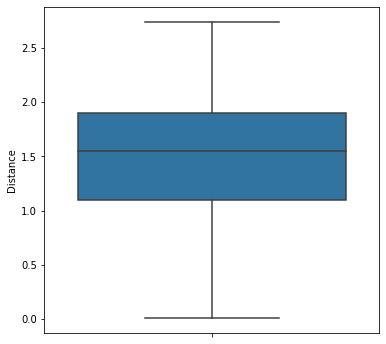

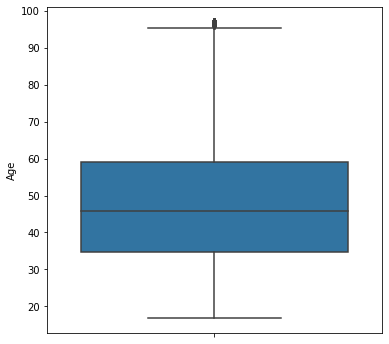

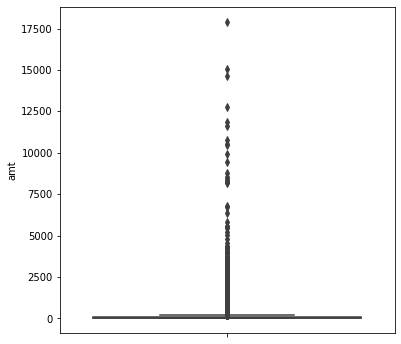

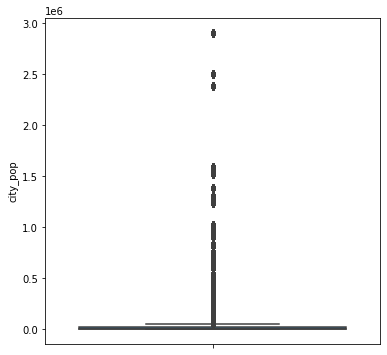

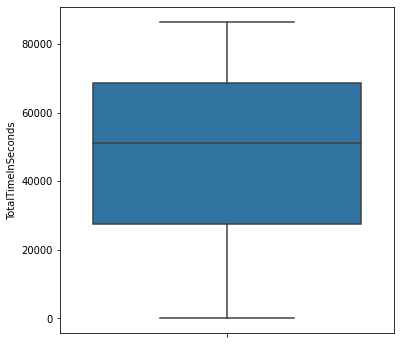

In [44]:
# Univariate Analysis of Numerical Columns
for c in numerical_columns:
    num_col_univariate_analysis(c)

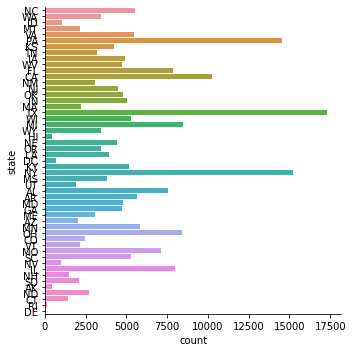

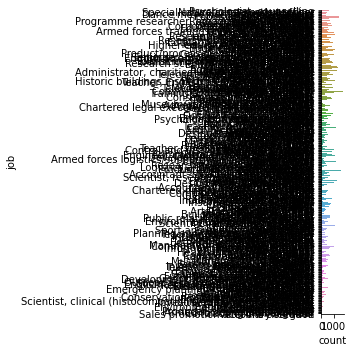

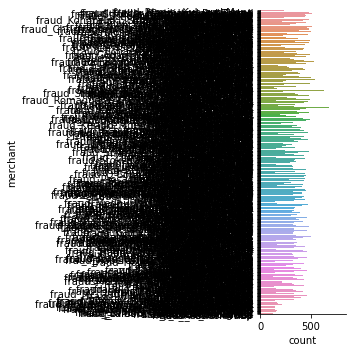

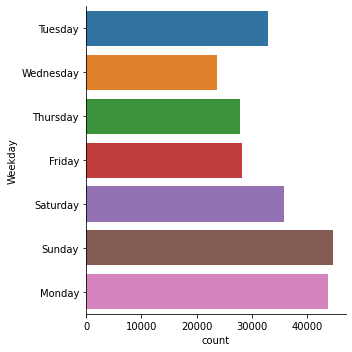

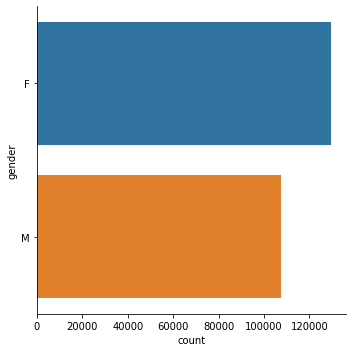

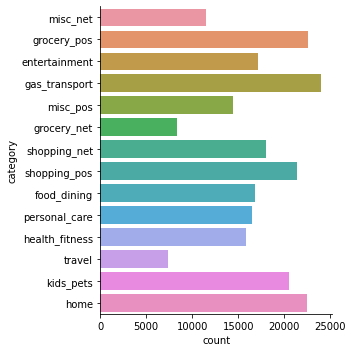

In [47]:
# Univariate Analysis of categorical Columns
for c in categorical_columns:
    cat_col_univariate_analysis(c)

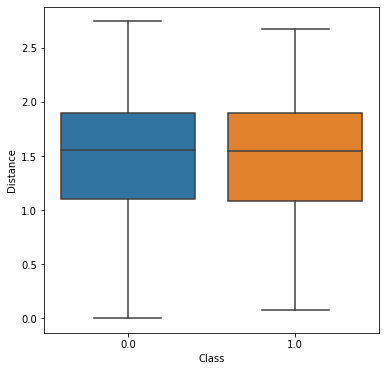

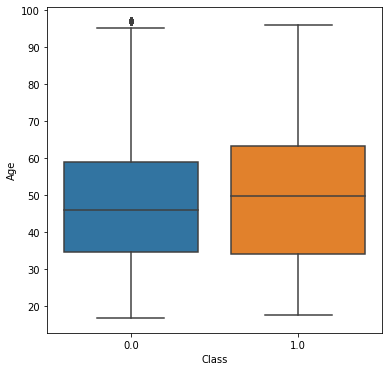

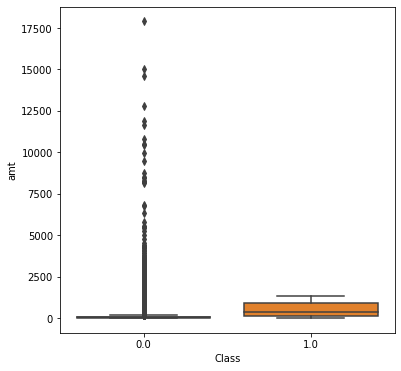

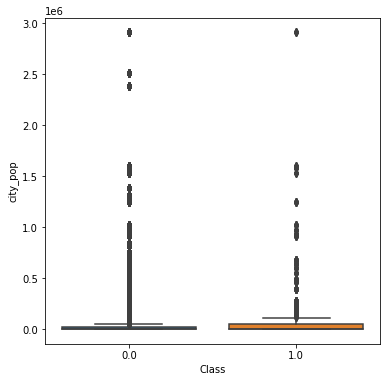

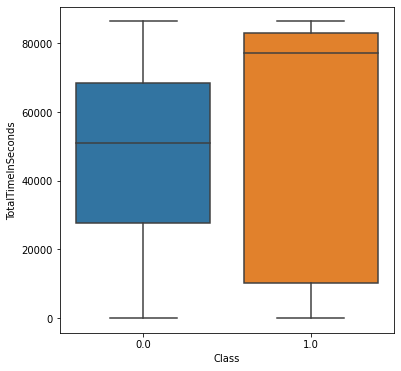

In [48]:
# Bivariate Analysis of Numerical Columns
for c in numerical_columns:
    num_col_bivariate_analysis('Class',c)

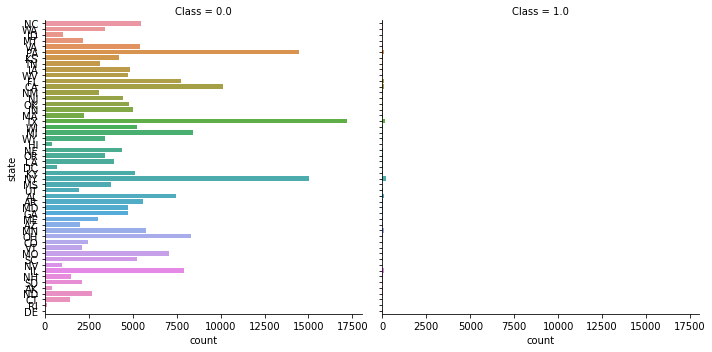

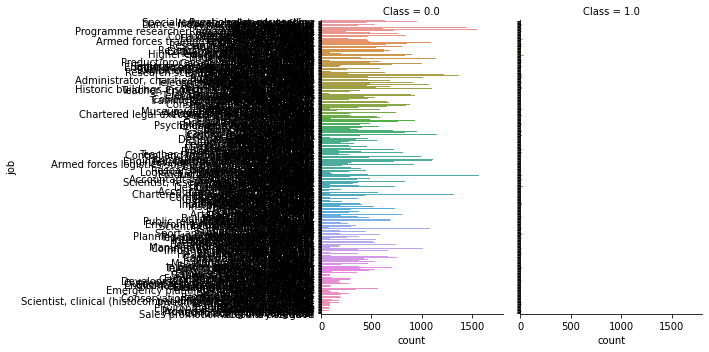

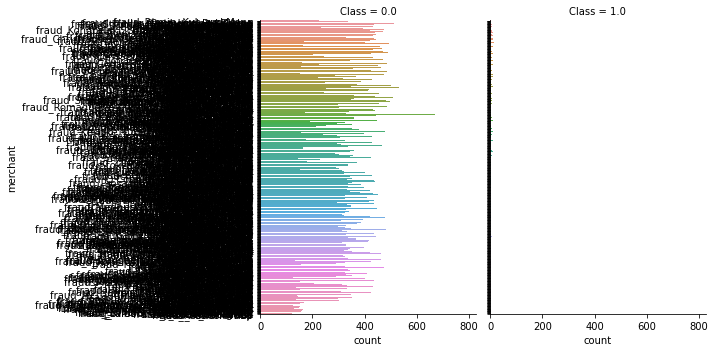

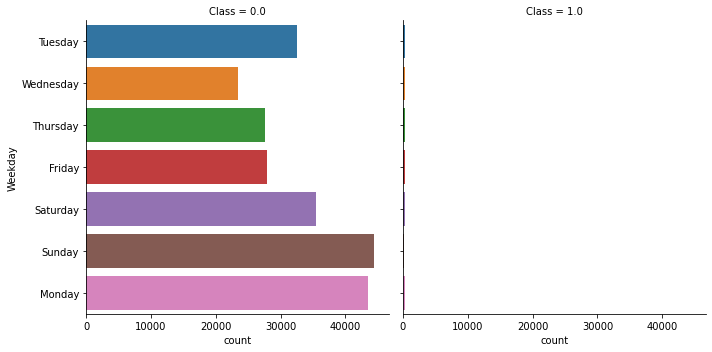

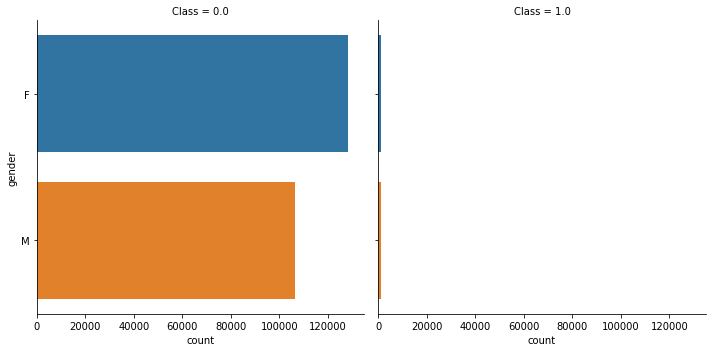

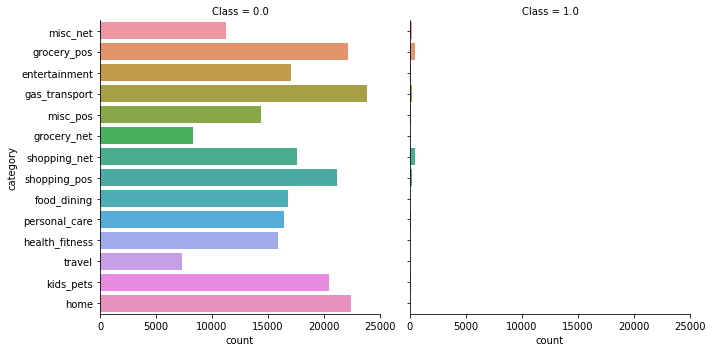

In [49]:
# Bivariate Analysis of Categorical Columns
for c in categorical_columns:
    cat_col_bivariate_analysis('Class',c)

#### Visualizing the correlation between all set of usable columns

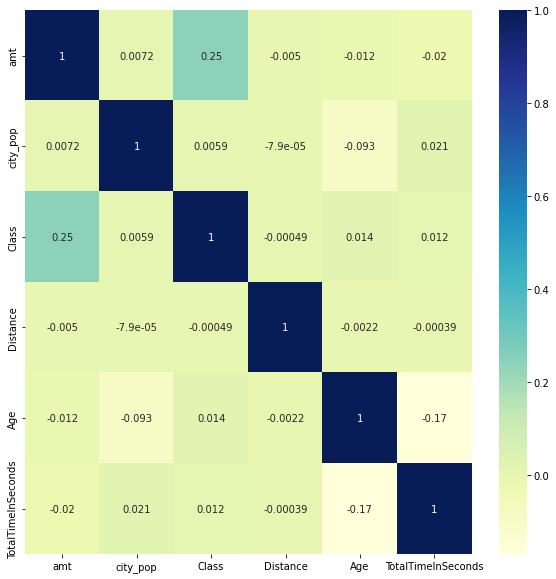

In [50]:
plt.figure(figsize=(10, 10))
sns.heatmap(Credit_data.corr(), cmap="YlGnBu",annot=True)

In [51]:
Credit_data.head()

,merchant,category,amt,gender,state,city_pop,job,Class,Distance,Weekday,Age,TotalTimeInSeconds
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,3495.0,"Psychologist, counselling",0.0,1.694346,Tuesday,33.608219,18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,149.0,Special educational needs teacher,0.0,0.528642,Tuesday,43.331507,44
2,fraud_Lind-Buckridge,entertainment,220.11,M,ID,4154.0,Nature conservation officer,0.0,1.894433,Tuesday,59.761644,51
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,1939.0,Patent attorney,0.0,1.785593,Tuesday,54.778082,76
4,fraud_Keeling-Crist,misc_pos,41.96,M,VA,99.0,Dance movement psychotherapist,0.0,1.685945,Tuesday,35.558904,186


#### Checking if all the records are unique in the data sets

In [52]:
Credit_data.index.is_unique

True

In [53]:
df_credit.index.is_unique

True

#### Copying the data set 'df_credit' to a new data set df_for_DA

In [55]:
df_for_DA=df_credit.copy(deep=True)
df_for_DT=df_credit.copy(deep=True)
df_for_RF=df_credit.copy(deep=True)


#### Getting the dummy variables for the categorical features

In [56]:
df_dummy= pd.get_dummies(df_credit[['gender','state','job','Weekday','category','merchant']],drop_first=True)

#### Merging  the dummy features created lately wuth the original date

In [57]:
df_for_DA=pd.concat([df_for_DA,df_dummy],axis=1)

In [58]:
df_for_DA.shape

(236681, 1269)

In [61]:
df_for_DA.head(2)

,TransactionDateTime,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,Class,Distance,Weekday,Current Date,Age,TransactionDate,TotalTimeInSeconds,gender_M,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,...,"merchant_fraud_Walter, Hettinger and Kessler",merchant_fraud_Waters-Cruickshank,merchant_fraud_Watsica LLC,"merchant_fraud_Watsica, Haag and Considine",merchant_fraud_Weber and Sons,"merchant_fraud_Weber, Thiel and Hammes","merchant_fraud_Weimann, Kuhic and Beahan",merchant_fraud_Weimann-Lockman,merchant_fraud_Welch Inc,"merchant_fraud_Welch, Rath and Koepp",merchant_fraud_White and Sons,merchant_fraud_Wiegand-Lowe,merchant_fraud_Wilkinson LLC,merchant_fraud_Wilkinson Ltd,merchant_fraud_Wilkinson PLC,merchant_fraud_Will Ltd,merchant_fraud_Williamson LLC,"merchant_fraud_Willms, Kris and Bergnaum",merchant_fraud_Windler LLC,"merchant_fraud_Windler, Goodwin and Kovacek","merchant_fraud_Wintheiser, Dietrich and Schimmel",merchant_fraud_Wisozk and Sons,"merchant_fraud_Witting, Beer and Ernser",merchant_fraud_Wiza LLC,"merchant_fraud_Wiza, Schaden and Stark",merchant_fraud_Wolf Inc,"merchant_fraud_Wuckert, Wintheiser and Friesen",merchant_fraud_Wuckert-Goldner,merchant_fraud_Wuckert-Walter,"merchant_fraud_Yost, Block and Koepp","merchant_fraud_Yost, Schamberger and Windler",merchant_fraud_Yost-Rogahn,merchant_fraud_Zboncak LLC,merchant_fraud_Zboncak Ltd,"merchant_fraud_Zboncak, Rowe and Murazik",merchant_fraud_Zemlak Group,"merchant_fraud_Zemlak, Tillman and Cremin",merchant_fraud_Ziemann-Waters,"merchant_fraud_Zieme, Bode and Dooley",merchant_fraud_Zulauf LLC
0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,0.629694,-1.416825,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,0.628516,-1.432013,0.0,1.694346,Tuesday,2021-10-09,33.608219,2019-01-01,18,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,0.853253,-2.063162,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,0.857987,-2.062743,0.0,0.528642,Tuesday,2021-10-09,43.331507,2019-01-01,44,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
df_for_DA.index.is_unique

True

In [63]:
df_for_DA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236681 entries, 0 to 236680
Columns: 1269 entries, TransactionDateTime to merchant_fraud_Zulauf LLC
dtypes: datetime64[ns](3), float64(12), int64(1), object(12), uint8(1241)
memory usage: 342.5+ MB


In [64]:
df_for_DA.isnull().values.any()

False

### **Getting the counts of records for Class 0 and Class 1**

In [65]:
#Check the fraud/Non_Fraud related records
df_for_DA['Class'].value_counts()

0.0    234831
1.0      1850
Name: Class, dtype: int64

In [66]:
#find % values of class
(df_credit.groupby('Class')['Class'].count()/df_credit['Class'].count()) *100

Class
0.0    99.218357
1.0     0.781643
Name: Class, dtype: float64

### Here we will observe the distribution of our classes

In [67]:
classes=df_credit['Class'].value_counts()
normal_share=classes[0]/df_credit['Class'].count()*100
fraud_share=classes[1]/df_credit['Class'].count()*100

#### Plotting the graph for the count of records of Class 0 and Class 1

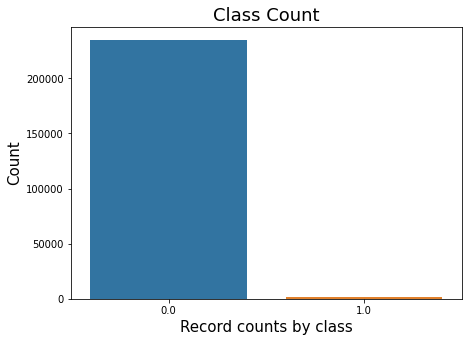

In [68]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(7,5))
sns.countplot(df_credit['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

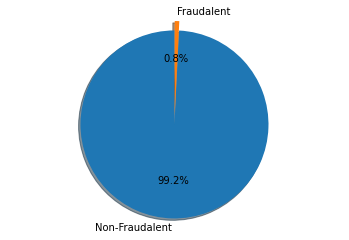

In [69]:
#Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages
classes=df_credit['Class'].value_counts()
normal_share=classes[0]/df_credit['Class'].count()*100
fraud_share=classes[1]/df_credit['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
print('The percentage of non fraud transaction is ', round(df_credit['Class'].value_counts()[0]/len(df_credit) * 100,2), '% of the dataset')
print('The percentage of fraud transaction is ', round(df_credit['Class'].value_counts()[1]/len(df_credit) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df_credit['Class'].value_counts()[1]/df_for_DA['Class'].value_counts()[0] * 100,2))

**Inference**

1. So we got result for fraudalent transactions, total 1850 fraudalent transactions out of 234831 total credit card transactions.

2. Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions.

3. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example. To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc

#### Creating a scatter plot to observe the distribution of classes with time as time is given in relative fashion, Timedelta represents the difference between two dates or times.

In [70]:
Delta_Time = pd.to_timedelta(df_for_DA['TotalTimeInSeconds'], unit='s')
#Create derived columns Mins, Day and hours
df_for_DA['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df_for_DA['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df_for_DA['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

Text(0.5, 1.05, 'Time vs Class Distribution')

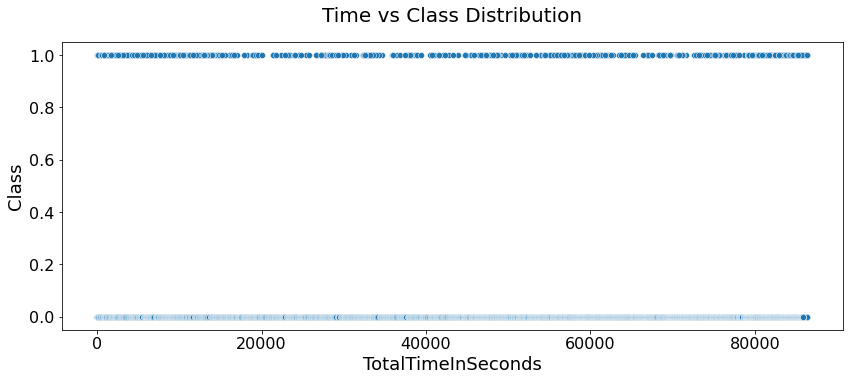

In [71]:
# Bivariate Analysis: Creating a scatter plot to observe the distribution of classes with time

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df_for_DA['TotalTimeInSeconds'], y='Class', palette=cmap, data=df_credit)
plt.xlabel('TotalTimeInSeconds', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)

**The fraudulent transactions Vs non fraudulent transaction day wise**

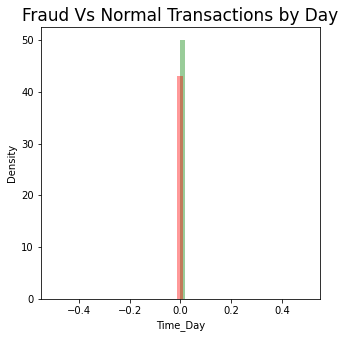

In [72]:

plt.figure(figsize=(5,5))
sns.distplot(df_for_DA[df_for_DA['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df_for_DA[df_for_DA['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

**Inference** 
1. The below graph shows fraud Vs normal trasaction on an hourly basis. 
2. We can observe here that these fradulent transactions (marked in red) are between 00:00 Hrs and 04:00 hrs.In simple terms, it is during the late night hours when these transactions happen.

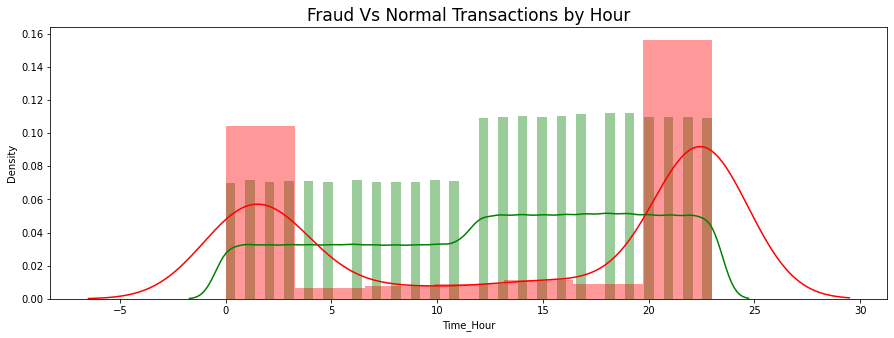

In [73]:

plt.figure(figsize=(15,5))
sns.distplot(df_for_DA[df_for_DA['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df_for_DA[df_for_DA['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

**In the below graph, the spikes for fraud transactions are more after 80000 seconds which comes in to 22:00 hrs. That is pretty relevant. Through out the day it is nornal. There are no spikes.**

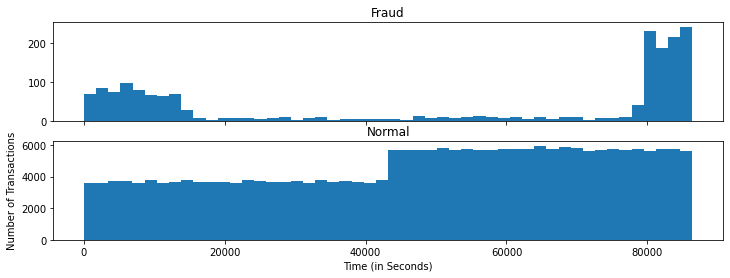

In [74]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df_credit.TotalTimeInSeconds[df_credit.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_credit.TotalTimeInSeconds[df_credit.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [75]:
# Create a scatter plot to observe the distribution of classes with Amount
#To clearly the data of frauds and no frauds
df_Frauds = df_credit[df_credit['Class'] == 1]
df_Regulars = df_credit[df_credit['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Frauds["amt"].describe())

count    1850.000000
mean      516.664297
std       395.920084
min         1.180000
25%       116.530000
50%       351.900000
75%       899.450000
max      1334.070000
Name: amt, dtype: float64


In [76]:
print(df_Regulars["amt"].describe())

count    234831.000000
mean         67.494366
std         152.997038
min           1.000000
25%           9.600000
50%          47.320000
75%          82.570000
max       17897.240000
Name: amt, dtype: float64



#### Describe data

**We are creating a scatter plot to observe the distribution of classes with amount.Hence we observe that amounts present in the fraudulent transactions varies within the range of 0 to 2500 ($)**

Text(0.5, 1.05, 'Amount vs Class Distribution')

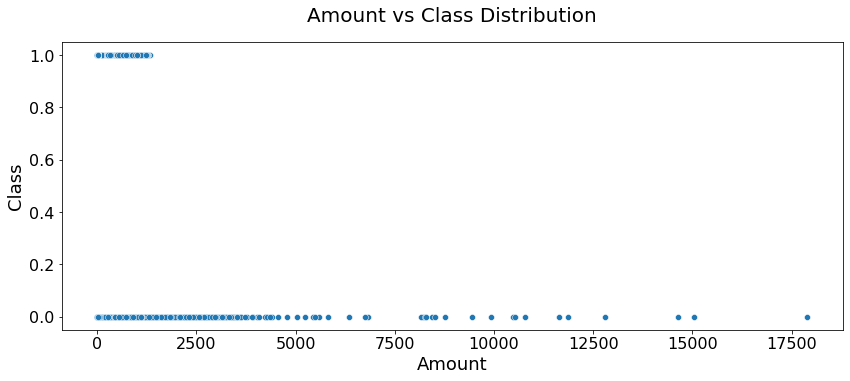

In [77]:
# Create a scatter plot to observe the distribution of classes with Amount

# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with Amount


fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df_credit['amt'], y='Class', palette=cmap, data=df_credit)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)

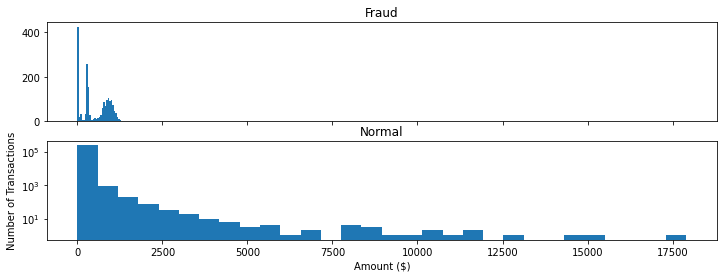

In [78]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df_credit.amt[df_credit.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_credit.amt[df_credit.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [ ]:
df_credit = df_credit.drop(['lat','merch_lat'],1)

In [81]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df_credit.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head()

Most important features relative to target variable Class


,Correlation
Class,1.000000
amt,0.245248
Age,0.014025
TotalTimeInSeconds,0.012325
city_pop,0.005920


**The list shown above is the list of important variables from the data frame which shall be engaged to identify fraudulent transactions.**

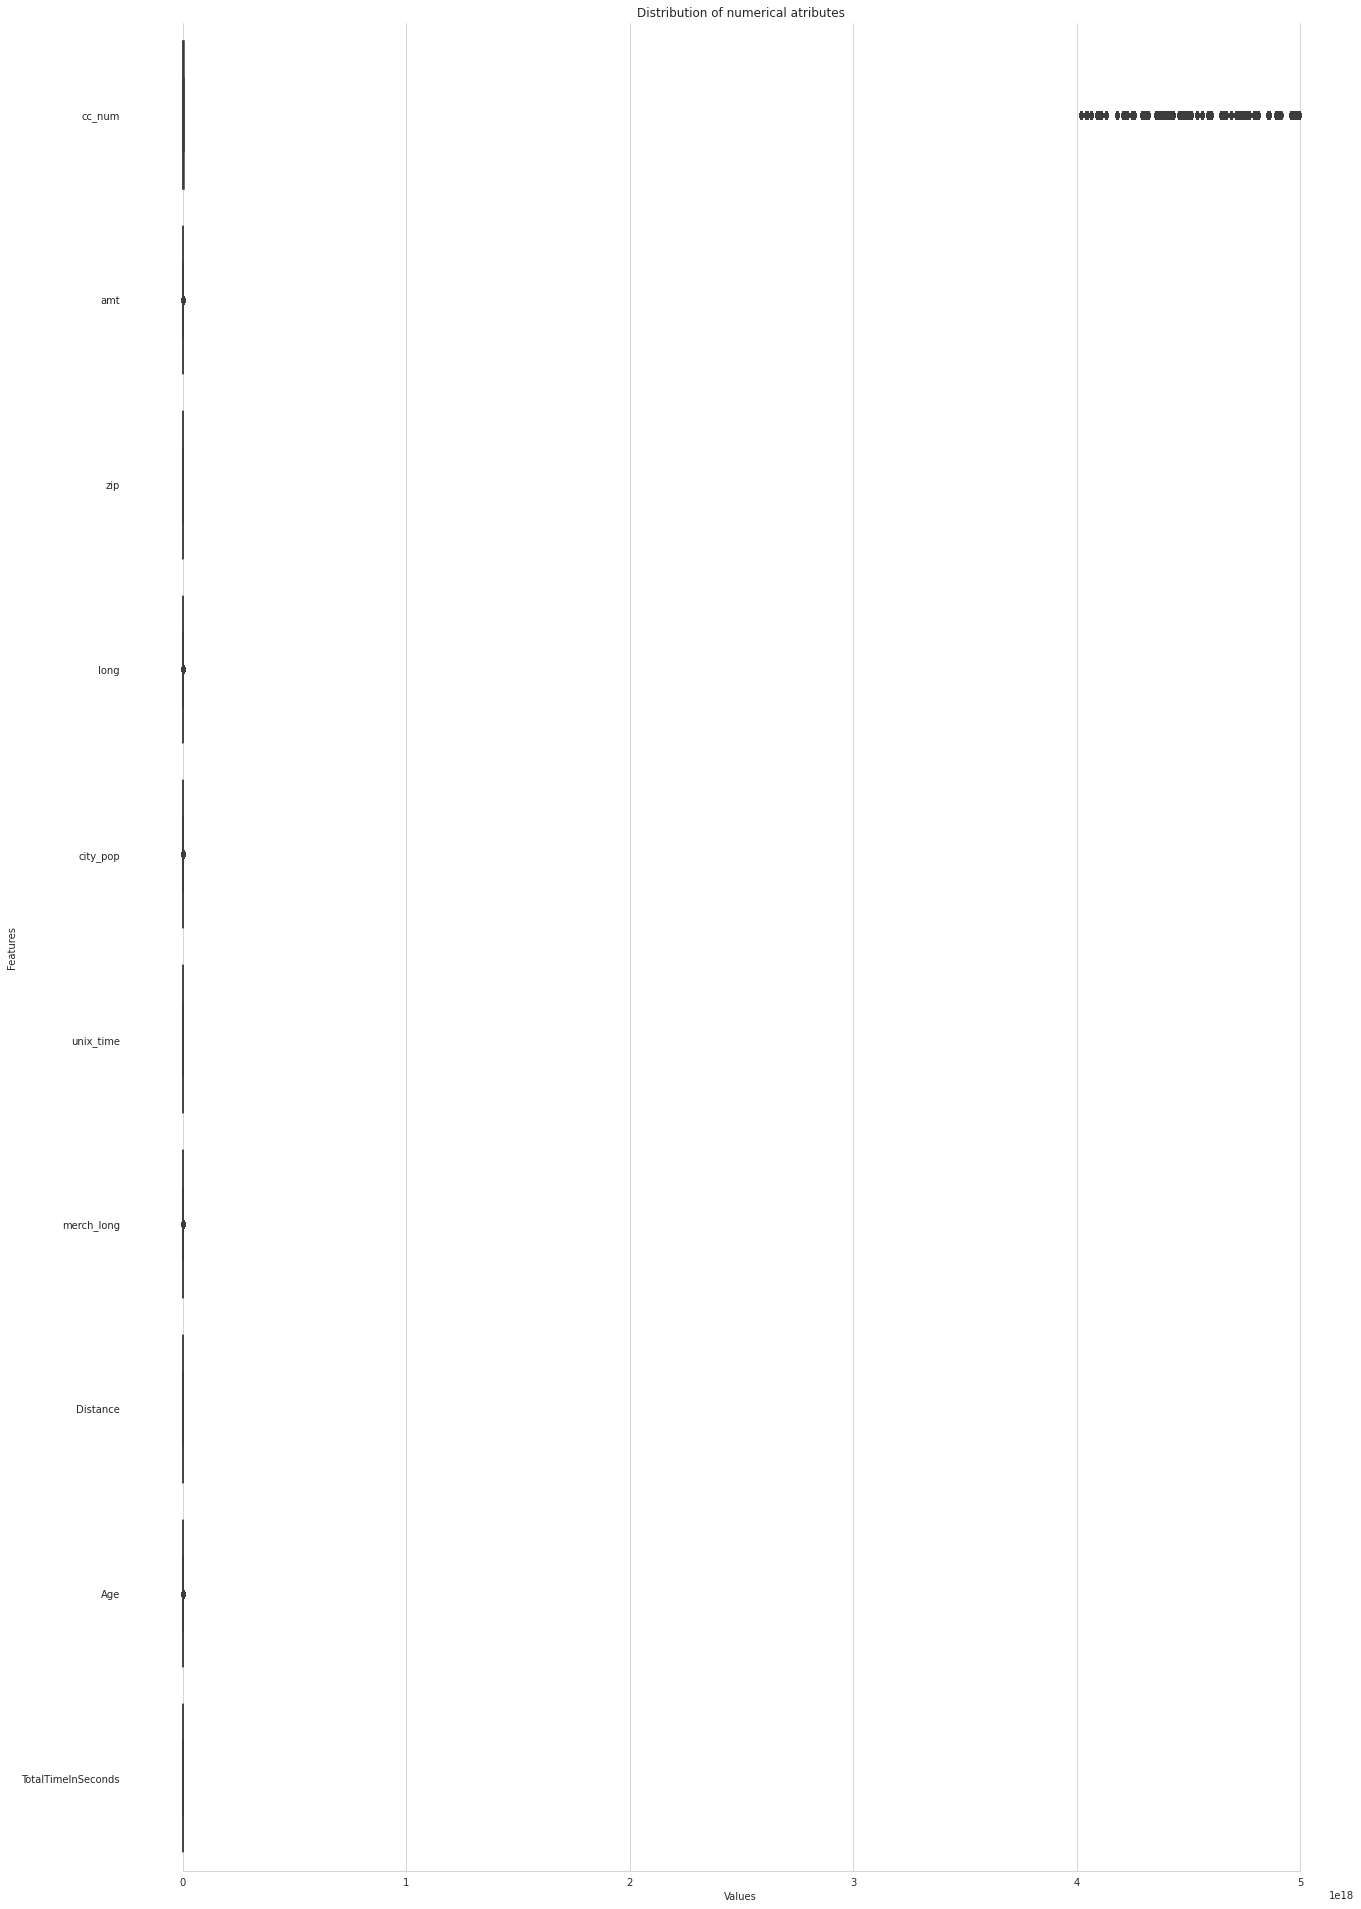

In [82]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df_credit.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df_credit[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

In [83]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time#
df_for_DA.drop('TotalTimeInSeconds', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df_for_DA.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

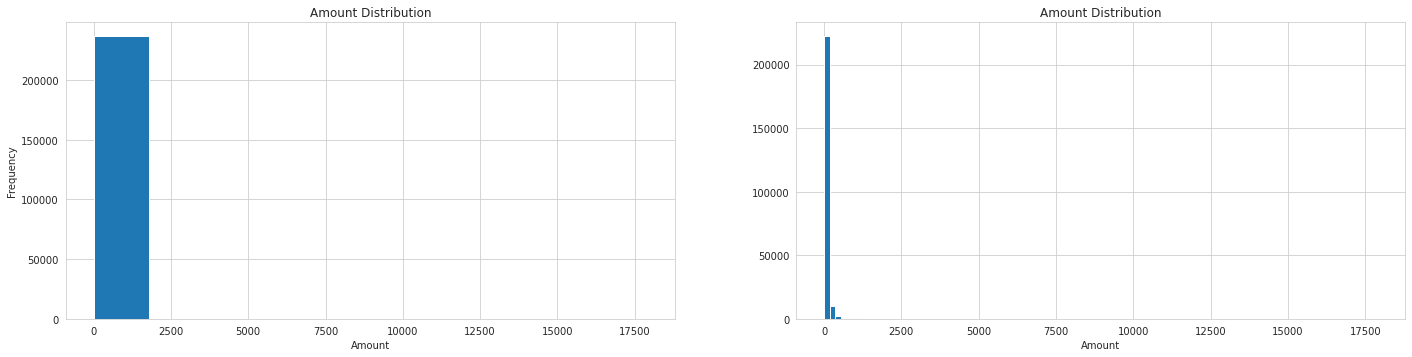

In [84]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df_for_DA['amt'].astype(int).plot.hist();
plt.xlabel("Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("Amount")
plt.hist(df_for_DA['amt'],bins=100)
plt.show()

In [87]:
#Dummy Variables
df_dummy= pd.get_dummies(df_credit[['gender','state','job','Weekday','category','merchant']],drop_first=True)

In [86]:
df_dummy.head()

,gender_M,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,...,"merchant_fraud_Walter, Hettinger and Kessler",merchant_fraud_Waters-Cruickshank,merchant_fraud_Watsica LLC,"merchant_fraud_Watsica, Haag and Considine",merchant_fraud_Weber and Sons,"merchant_fraud_Weber, Thiel and Hammes","merchant_fraud_Weimann, Kuhic and Beahan",merchant_fraud_Weimann-Lockman,merchant_fraud_Welch Inc,"merchant_fraud_Welch, Rath and Koepp",merchant_fraud_White and Sons,merchant_fraud_Wiegand-Lowe,merchant_fraud_Wilkinson LLC,merchant_fraud_Wilkinson Ltd,merchant_fraud_Wilkinson PLC,merchant_fraud_Will Ltd,merchant_fraud_Williamson LLC,"merchant_fraud_Willms, Kris and Bergnaum",merchant_fraud_Windler LLC,"merchant_fraud_Windler, Goodwin and Kovacek","merchant_fraud_Wintheiser, Dietrich and Schimmel",merchant_fraud_Wisozk and Sons,"merchant_fraud_Witting, Beer and Ernser",merchant_fraud_Wiza LLC,"merchant_fraud_Wiza, Schaden and Stark",merchant_fraud_Wolf Inc,"merchant_fraud_Wuckert, Wintheiser and Friesen",merchant_fraud_Wuckert-Goldner,merchant_fraud_Wuckert-Walter,"merchant_fraud_Yost, Block and Koepp","merchant_fraud_Yost, Schamberger and Windler",merchant_fraud_Yost-Rogahn,merchant_fraud_Zboncak LLC,merchant_fraud_Zboncak Ltd,"merchant_fraud_Zboncak, Rowe and Murazik",merchant_fraud_Zemlak Group,"merchant_fraud_Zemlak, Tillman and Cremin",merchant_fraud_Ziemann-Waters,"merchant_fraud_Zieme, Bode and Dooley",merchant_fraud_Zulauf LLC
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
df_credit=pd.concat([df_credit,df_dummy],axis=1)

In [89]:
df_credit=df_credit.drop(['gender','state','job','Weekday','category','merchant'],1)

In [90]:
df_credit=df_credit.drop(['TransactionDateTime','cc_num','first','last','street','zip','city','dob','trans_num','unix_time','merch_long','long'],1)

In [91]:
df_credit=df_credit.drop(['TransactionDate','Current Date'],1)

**All the features have gone through the PCA process (Principal Component Analysis)**

**Splitting the data into train & test data**

In [92]:
df_credit.index.is_unique

True

In [93]:
df_data=df_credit.copy(deep=True)

In [94]:
df_data.shape

(236681, 1247)

In [95]:
df_for_DA=df_for_DA.drop(['TransactionDateTime','cc_num','first','last','street','zip','lat','long','merch_lat','merch_long','Current Date'],1)

In [96]:
df_for_DA.index.is_unique

True

In [97]:
df_data.isnull().values.any()

False

In [98]:
 df_data.isna().any() 

amt                                          False
city_pop                                     False
Class                                        False
Distance                                     False
Age                                          False
                                             ...  
merchant_fraud_Zemlak Group                  False
merchant_fraud_Zemlak, Tillman and Cremin    False
merchant_fraud_Ziemann-Waters                False
merchant_fraud_Zieme, Bode and Dooley        False
merchant_fraud_Zulauf LLC                    False
Length: 1247, dtype: bool

In [99]:
#Create X and y dataset for independent and dependent data
y= df_data['Class']
X = df_data.drop(['Class'], axis=1)

In [100]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.30)

In [101]:
X_test.isnull().values.any()

False

We need to preserve X_test & y_test to evaluate on the test data once we build the model

In [102]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

1850.0
1309.0
541.0


In [103]:
cols = list(X.columns.values)

In [104]:
cols

['amt',
 'city_pop',
 'Distance',
 'Age',
 'TotalTimeInSeconds',
 'gender_M',
 'state_AL',
 'state_AR',
 'state_AZ',
 'state_CA',
 'state_CO',
 'state_CT',
 'state_DC',
 'state_DE',
 'state_FL',
 'state_GA',
 'state_HI',
 'state_IA',
 'state_ID',
 'state_IL',
 'state_IN',
 'state_KS',
 'state_KY',
 'state_LA',
 'state_MA',
 'state_MD',
 'state_ME',
 'state_MI',
 'state_MN',
 'state_MO',
 'state_MS',
 'state_MT',
 'state_NC',
 'state_ND',
 'state_NE',
 'state_NH',
 'state_NJ',
 'state_NM',
 'state_NV',
 'state_NY',
 'state_OH',
 'state_OK',
 'state_OR',
 'state_PA',
 'state_RI',
 'state_SC',
 'state_SD',
 'state_TN',
 'state_TX',
 'state_UT',
 'state_VA',
 'state_VT',
 'state_WA',
 'state_WI',
 'state_WV',
 'state_WY',
 'job_Accountant, chartered certified',
 'job_Accountant, chartered public finance',
 'job_Accounting technician',
 'job_Acupuncturist',
 'job_Administrator',
 'job_Administrator, arts',
 'job_Administrator, charities/voluntary organisations',
 'job_Administrator, educati

**Checking the skewness in the data set**

**Illustrating some machine learning models like**

1.   Decision Tree Classifier
2.   Random Forest Classifier



In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
df_data.isnull().values.any()

False

In [112]:
# Putting feature variable to X
X = df_data.drop('Class',axis=1)

# Putting response variable to y
y = df_data['Class']

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)
X_train.shape, X_test.shape

((142008, 1246), (94673, 1246))

In [114]:
df_data.head()

,amt,city_pop,Class,Distance,Age,TotalTimeInSeconds,gender_M,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,...,"merchant_fraud_Walter, Hettinger and Kessler",merchant_fraud_Waters-Cruickshank,merchant_fraud_Watsica LLC,"merchant_fraud_Watsica, Haag and Considine",merchant_fraud_Weber and Sons,"merchant_fraud_Weber, Thiel and Hammes","merchant_fraud_Weimann, Kuhic and Beahan",merchant_fraud_Weimann-Lockman,merchant_fraud_Welch Inc,"merchant_fraud_Welch, Rath and Koepp",merchant_fraud_White and Sons,merchant_fraud_Wiegand-Lowe,merchant_fraud_Wilkinson LLC,merchant_fraud_Wilkinson Ltd,merchant_fraud_Wilkinson PLC,merchant_fraud_Will Ltd,merchant_fraud_Williamson LLC,"merchant_fraud_Willms, Kris and Bergnaum",merchant_fraud_Windler LLC,"merchant_fraud_Windler, Goodwin and Kovacek","merchant_fraud_Wintheiser, Dietrich and Schimmel",merchant_fraud_Wisozk and Sons,"merchant_fraud_Witting, Beer and Ernser",merchant_fraud_Wiza LLC,"merchant_fraud_Wiza, Schaden and Stark",merchant_fraud_Wolf Inc,"merchant_fraud_Wuckert, Wintheiser and Friesen",merchant_fraud_Wuckert-Goldner,merchant_fraud_Wuckert-Walter,"merchant_fraud_Yost, Block and Koepp","merchant_fraud_Yost, Schamberger and Windler",merchant_fraud_Yost-Rogahn,merchant_fraud_Zboncak LLC,merchant_fraud_Zboncak Ltd,"merchant_fraud_Zboncak, Rowe and Murazik",merchant_fraud_Zemlak Group,"merchant_fraud_Zemlak, Tillman and Cremin",merchant_fraud_Ziemann-Waters,"merchant_fraud_Zieme, Bode and Dooley",merchant_fraud_Zulauf LLC
0,4.97,3495.0,0.0,1.694346,33.608219,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107.23,149.0,0.0,0.528642,43.331507,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,220.11,4154.0,0.0,1.894433,59.761644,51,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,1939.0,0.0,1.785593,54.778082,76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,41.96,99.0,0.0,1.685945,35.558904,186,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [115]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [116]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

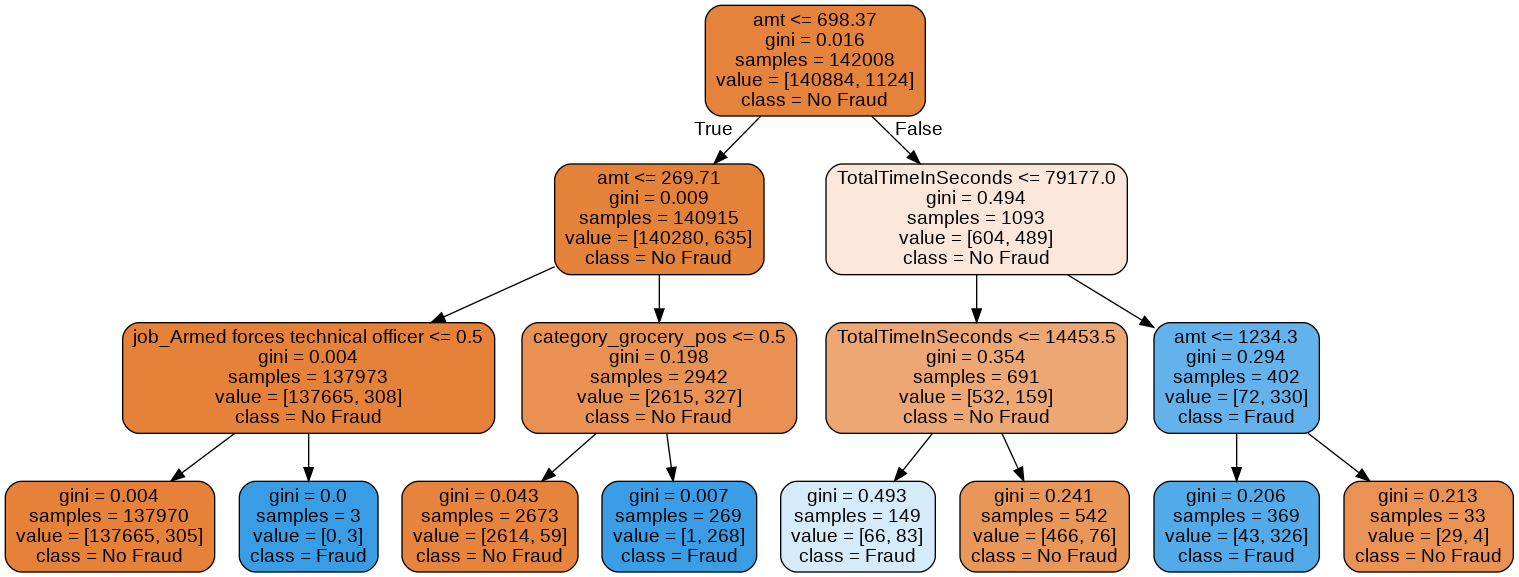

In [117]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Fraud', "Fraud"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**In the above chart shown, we can see the various conditions and criterias applied to the data to declare the record/transaction as fraud.**

In [118]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [120]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9960988113345727


array([[140774,    110],
       [   444,    680]])

In [121]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9960495600646435


array([[93881,    66],
       [  308,   418]])

**This decision tree model has 99.6% accuracy. It signifies that it has learnt the train data.**

**Random Forest Classifier**

In [122]:
from sklearn.ensemble import RandomForestClassifier
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['No Fraud', "Fraud"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [123]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [124]:
rf.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1608637542, splitter='best')

In [126]:
sample_tree = rf.estimators_[4]

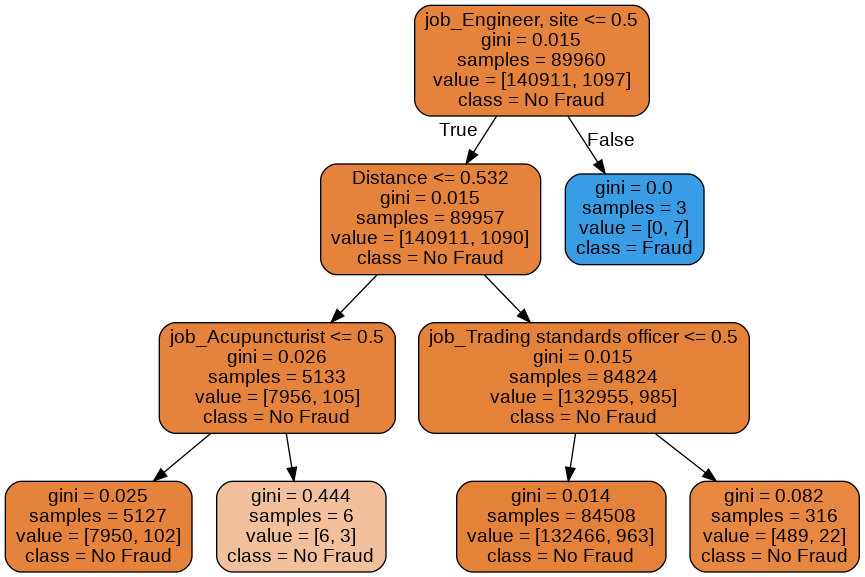

In [127]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=1000, height=700)

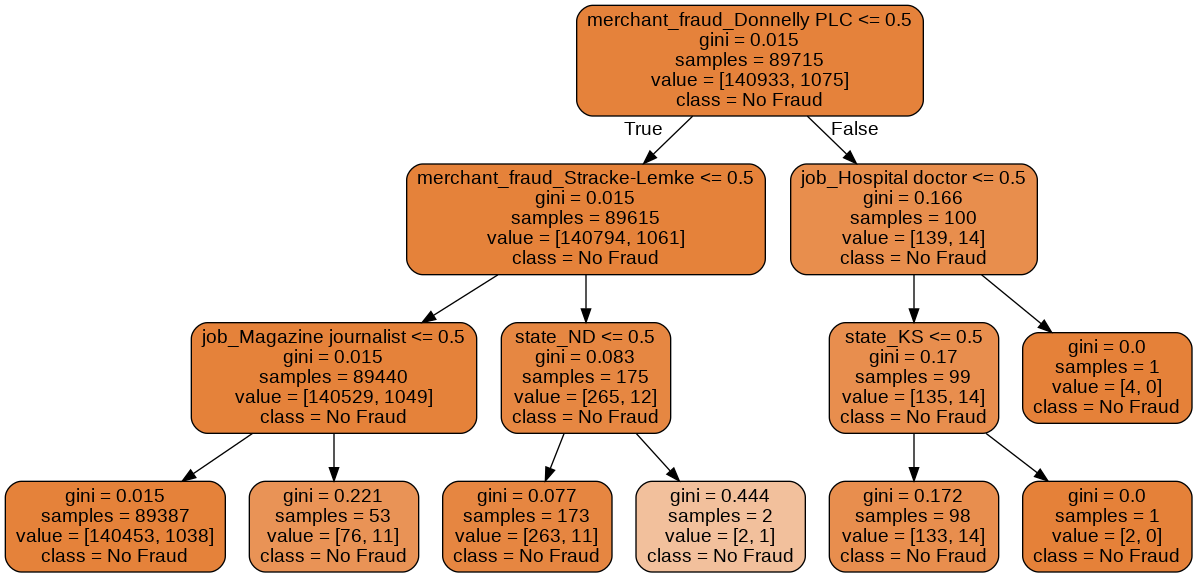

In [128]:
gph = get_dt_graph(rf.estimators_[2])
Image(gph.create_png(), width=1000, height=700)

In [129]:
evaluate_model(rf)

Train Accuracy : 0.9920849529603966
Train Confusion Matrix:
[[140884      0]
 [  1124      0]]
--------------------------------------------------
Test Accuracy : 0.992331498949014
Test Confusion Matrix:
[[93947     0]
 [  726     0]]


**The accuracy rate for this model is 99.20% which is almost same as the previous one.**

In [144]:
#Create a dataframe to store results
df_Result = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

#### We are writing a function to create the confusion matrix which will be used in the later part of the project

In [159]:
def Plot_confusion_matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    classNames = ['Non-Fraudalent','Fraudalent']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

#### Function for building Linear Regression model with ROC -AUC Score

In [160]:
def buildAndRunLogisticModels(df_Result, DataImabalance, X_train,y_train, X_test, y_test ):

    # Logistic Regression
    from sklearn import linear_model #import the package
    from sklearn.model_selection import KFold

    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

    searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
    #searchCV.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)
    searchCV_l1.fit(X_train, y_train)
    print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
    print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

    print("Parameters for l2 regularisations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_) 
    print(searchCV_l2.scores_) 

    print("Parameters for l1 regularisations")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_) 
    print(searchCV_l1.scores_) 


    #find predicted vallues
    y_pred_l2 = searchCV_l2.predict(X_test)
    y_pred_l1 = searchCV_l1.predict(X_test)


    #Find predicted probabilities
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

    # Accuaracy of L2/L1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

    print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("classification Report")
    print(classification_report(y_test, y_pred_l2))
    print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)
    print("classification Report")
    print(classification_report(y_test, y_pred_l1))

    from sklearn.metrics import roc_auc_score
    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("l2 roc_value: {0}" .format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Result = df_Result.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("l1 roc_value: {0}" .format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Result = df_Result.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
    return df_Result

Function for building KNN model with ROC -AUC Score

In [161]:
def buildAndRunKNNModels(df_Result,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    print("model score")
    print(score)
  
  #Accuracy
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))


    knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {0}" .format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Result = df_Result.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Result

**Function for building SVM model with ROC -AUC Score**

In [162]:
def buildAndRunSVMModels(df_Result, DataImabalance, X_train,y_train, X_test, y_test ):
#Evaluate SVM model with sigmoid kernel  model
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score

    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train,y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test,y_pred_SVM)
    print("accuracy_score : {0}".format(SVM_Score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("classification Report")
    print(classification_report(y_test, y_pred_SVM))



    # Run classifier
    classifier = SVC(kernel='sigmoid' , probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)

    print("SVM roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Result= df_Result.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Result

**Function for building tree model with ROC -AUC Score**

In [163]:
def buildAndRunTreeModels(df_Result, DataImabalance, X_train,y_train, X_test, y_test ):
#Evaluate Decision Tree model with 'gini' & 'entropy'
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_auc_score
    criteria = ['gini', 'entropy'] 
    scores = {} 

    for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()

      df_Result = df_Result.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

      return df_Result

**Function for building Random Forest model with ROc -AUC Score**

In [164]:
def buildAndRunRandomForestModels(df_Result, DataImabalance, X_train,y_train, X_test, y_test ):
    #Evaluate Random Forest model

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import roc_auc_score

    # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
    # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)
    RF_model.predict(X_test)

    print('Model Accuracy: {0}'.format(RF_test_score))


    # Actual class predictions
    rf_predictions = RF_model.predict(X_test)

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, rf_predictions)
    print("classification Report")
    print(classification_report(y_test, rf_predictions))

    # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, rf_probs)

    print("Random Forest roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Forest threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    df_Result = df_Result.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Result

**Function for calculating XG Boost model with ROC -AUC Score**

In [165]:
def buildAndRunXGBoostModels(df_Result, DataImabalance,X_train,y_train, X_test, y_test ):
    #Evaluate XGboost model
    from xgboost import XGBClassifier
    from sklearn.metrics import roc_auc_score
    # fit model no training data
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)

    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)

    print("XGboost roc_value: {0}" .format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Result = df_Result.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Result




Model Building


#### Perform cross validation with RepeatedKFold

**Inference**

    1.The k-fold cross-validation procedure is a standard method for estimating the performance of a ML 
    algorithm or configuration on a dataset.A single run of the k-fold cross-validation procedure may result in a noisy estimate of model performance. Different splits of the data may result in very different results.

    2. Repeated k-fold cross-validation provides a way to improve the estimated performance of a machine learning model.This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. 
    
    3.This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error.




In [166]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      4 ... 236678 236679 236680] TEST: [     2      3      9 ... 236641 236653 236660]
TRAIN: [     1      2      3 ... 236678 236679 236680] TEST: [     0     19     20 ... 236667 236668 236673]
TRAIN: [     0      2      3 ... 236678 236679 236680] TEST: [     1      5      7 ... 236675 236676 236677]
TRAIN: [     0      1      2 ... 236677 236678 236679] TEST: [    11     13     16 ... 236650 236657 236680]
TRAIN: [     0      1      2 ... 236676 236677 236680] TEST: [     4      6      8 ... 236674 236678 236679]
TRAIN: [     1      2      3 ... 236678 236679 236680] TEST: [     0     11     15 ... 236663 236664 236668]
TRAIN: [     0      1      3 ... 236676 236677 236680] TEST: [     2      7     13 ... 236675 236678 236679]
TRAIN: [     0      1      2 ... 236677 236678 236679] TEST: [     4     10     32 ... 236672 236676 236680]
TRAIN: [     0      1      2 ... 236678 236679 236680] TEST: [     3      5      6 ... 236670 236674 236677]
TRAIN: [     0     

**KNN Model:-**
A k-nearest-neighbor algorithm, often abbreviated k-nn, is an approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.

The k-nearest-neighbor is an example of a "lazy learner" algorithm, meaning that it does not build a model using the training set until a query of the data set is performed.

KNN Model
model score
0.9932398174750718
Confusion Matrix


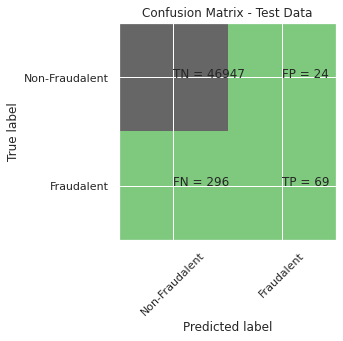

classification Report
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     46971
         1.0       0.74      0.19      0.30       365

    accuracy                           0.99     47336
   macro avg       0.87      0.59      0.65     47336
weighted avg       0.99      0.99      0.99     47336

KNN roc_value: 0.7155706391848308
KNN threshold: 0.2
ROC for the test dataset 71.6%


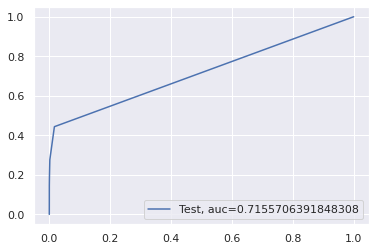

Time Taken by Model: --- 200.1087429523468 seconds ---
--------------------------------------------------------------------------------


In [167]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Result = buildAndRunKNNModels(df_Result,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

**The area under the curve for this model is 71.55% which is not as good as we are expecting. We are expecting a higher value for AUC.**

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9969579178637823
Confusion Matrix


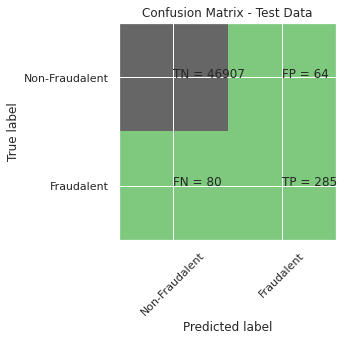

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46971
         1.0       0.82      0.78      0.80       365

    accuracy                           1.00     47336
   macro avg       0.91      0.89      0.90     47336
weighted avg       1.00      1.00      1.00     47336

gini tree_roc_value: 0.8897296874813168
Tree threshold: 1.0
ROC for the test dataset 89.0%


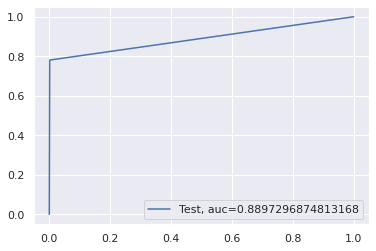

Time Taken by Model: --- 36.501649379730225 seconds ---
--------------------------------------------------------------------------------


In [170]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Result = buildAndRunTreeModels(df_Result,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.9965776575967551
Confusion Matrix


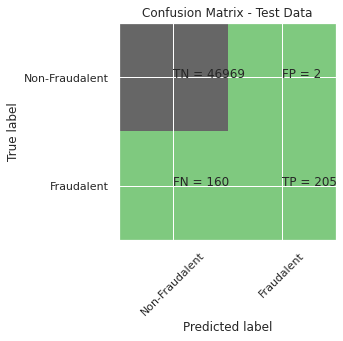

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46971
         1.0       0.99      0.56      0.72       365

    accuracy                           1.00     47336
   macro avg       0.99      0.78      0.86     47336
weighted avg       1.00      1.00      1.00     47336

Random Forest roc_value: 0.9855729693897399
Random Forest threshold: 0.04
ROC for the test dataset 98.6%


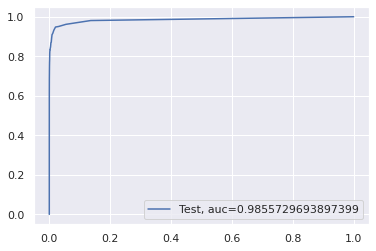

Time Taken by Model: --- 203.47433519363403 seconds ---
--------------------------------------------------------------------------------


In [168]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Result = buildAndRunRandomForestModels(df_Result,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

**Now if we observe this model, the AUC is 98.55% which is tremendously good.**

In [171]:
df_Result

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,KNN,0.993240,0.715571,0.20
1,RepeatedKFold Cross Validation,Random Forest,0.996578,0.985573,0.04
2,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.996958,0.889730,1.00


**Looking at the table above, we can say that Random Forest is the best one out of the models implmeneted with Repeated K-Fold Cross Validation.**

**Perform cross validation with StratifiedKFold:**
Stratified kfold cross validation is an extension of regular kfold cross validation but specifically for classification problems where rather than the splits being completely random, the ratio between the target classes is the same in each fold as it is in the full dataset.



In [172]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 36318  36611  36777 ... 236678 236679 236680] TEST: [    0     1     2 ... 47389 47390 47391]
TRAIN: [     0      1      2 ... 236678 236679 236680] TEST: [36318 36611 36777 ... 94843 94844 94845]
TRAIN: [     0      1      2 ... 236678 236679 236680] TEST: [ 75149  75323  75343 ... 142208 142209 142210]
TRAIN: [     0      1      2 ... 236678 236679 236680] TEST: [118032 118079 118091 ... 189448 189449 189450]
TRAIN: [     0      1      2 ... 189448 189449 189450] TEST: [163820 163839 163866 ... 236678 236679 236680]


KNN Model
model score
0.993303194186243
Confusion Matrix


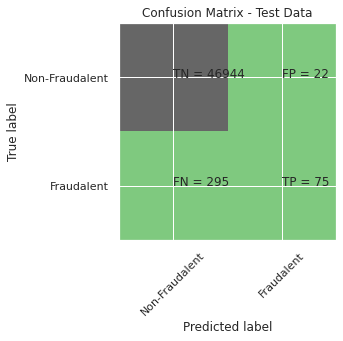

classification Report
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     46966
         1.0       0.77      0.20      0.32       370

    accuracy                           0.99     47336
   macro avg       0.88      0.60      0.66     47336
weighted avg       0.99      0.99      0.99     47336

KNN roc_value: 0.6584768337302084
KNN threshold: 0.2
ROC for the test dataset 65.8%


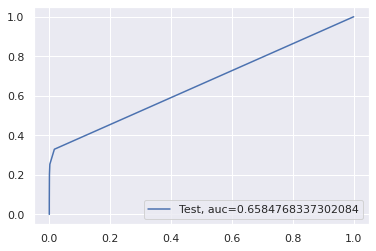

Time Taken by Model: --- 206.38496470451355 seconds ---
--------------------------------------------------------------------------------


In [173]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Result = buildAndRunKNNModels(df_Result,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

**Inference**

    1.Here, we see that KNN model is performing poorly with Stratified K-Fold cross validation method.Hence, we cannot consider this model as the appropriate one. The AOC percentage is 65.847% which is not good at all. 
    
    2.Machine learning model tends to become more stable for the data set with the increase in the AUC score.

**Inference**

    1.Gini Index, also known as Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. If all the elements are linked with a single class then it can be called pure.

**Entropy is a measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information.**

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9968945411526111
Confusion Matrix


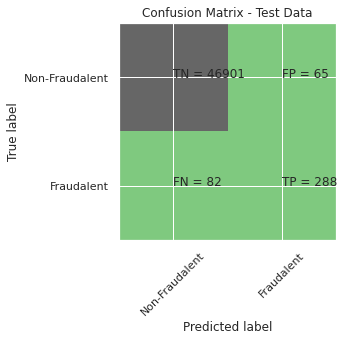

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46966
         1.0       0.82      0.78      0.80       370

    accuracy                           1.00     47336
   macro avg       0.91      0.89      0.90     47336
weighted avg       1.00      1.00      1.00     47336

gini tree_roc_value: 0.8884971992390125
Tree threshold: 1.0
ROC for the test dataset 88.8%


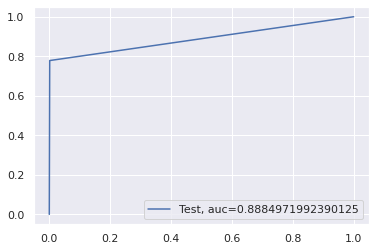

Time Taken by Model: --- 38.28776955604553 seconds ---
--------------------------------------------------------------------------------


In [174]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Result = buildAndRunTreeModels(df_Result,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.9960917694777759
Confusion Matrix


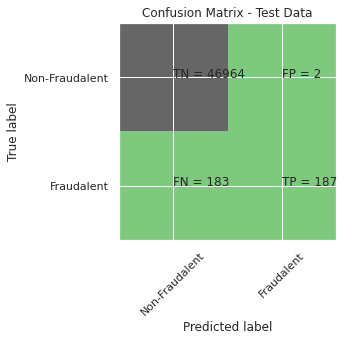

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46966
         1.0       0.99      0.51      0.67       370

    accuracy                           1.00     47336
   macro avg       0.99      0.75      0.83     47336
weighted avg       1.00      1.00      1.00     47336

Random Forest roc_value: 0.9682146716831382
Random Forest threshold: 0.02
ROC for the test dataset 96.8%


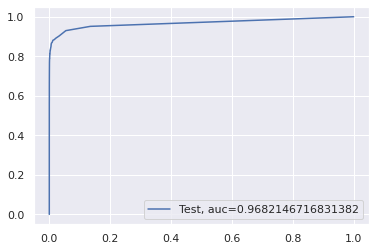

Time Taken by Model: --- 204.55796885490417 seconds ---
--------------------------------------------------------------------------------


In [175]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Result = buildAndRunRandomForestModels(df_Result,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

**Again, we can see that Random Forest performs very well on validation date and test data. We have the AUC as 96.82% which is the highest among the models implemented here.This model seems to be the most suitable for the given data set.**

In [176]:
df_Result

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,KNN,0.993240,0.715571,0.20
1,RepeatedKFold Cross Validation,Random Forest,0.996578,0.985573,0.04
2,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.996958,0.889730,1.00
3,StratifiedKFold Cross Validation,KNN,0.993303,0.658477,0.20
4,StratifiedKFold Cross Validation,Tree Model with gini criteria,0.996895,0.888497,1.00
5,StratifiedKFold Cross Validation,Random Forest,0.996092,0.968215,0.02


**Looking at the table above, we can observe that Tree Model with entropy is performing well among the models implmented here.**

**Inference:**

1. Load two dataset and merged these into one and cleaned it by using Exploratory data Analysis.

2. Using univariate and bivariate analysis for EDA.

3. Then Dividied the cleaned data set into validation data set and train data set. 

4. then Build few models using the data set and also using various approaches(Repeated K-Fold & Stratified K-Fold).

5. after these steps, we understand and decided for conclusion using different appraoches, that most suitable of Machine learning model depends upon the AUC score.

6. Now Decided that 

    1.   Using Repeated k-Fold, Random Forest Classifier proves to be the suitable model among all the others models implemented here.
    2.   Using Stratified k-Fold, Random Forest Classifier proves to be the suitable model among all the others  models implemented here. 



**CONCLUSION:-**

1. Credit card fraud is without a doubt an act of criminal dishonesty.

2. In this scenario, after handling On a high level fraud data, these models can help the bank to identify the frauds and notify the customer about it. 

3. Fraud detection is a complex issue that requires a substantial amount of planning before throwing machine learning algorithms at it. Nonetheless, it is also an application of data science and machine learning for the good, which makes sure that the customer’s money is safe and not easily tampered with.

4. There are certain advanced models which can also be used to idenity frauds in Credit Card transaction scenarios.
